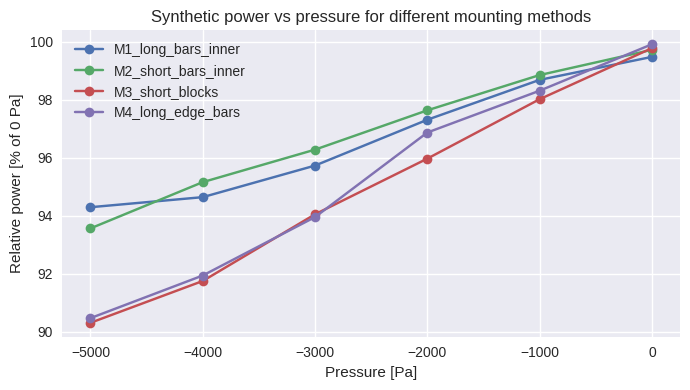

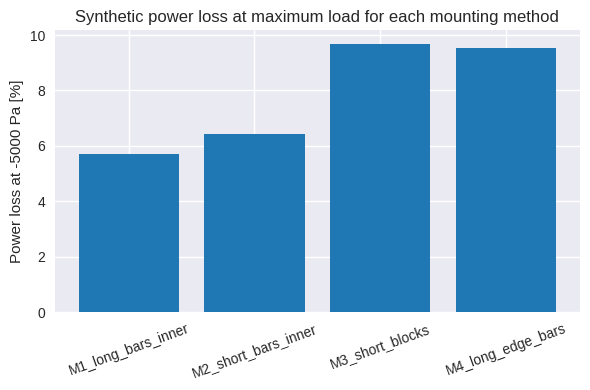

,mounting,pressure_Pa,P_rel_percent,P_loss_percent
5,M1_long_bars_inner,-5000,94.293183,5.706817
11,M2_short_bars_inner,-5000,93.563718,6.436282
23,M4_long_edge_bars,-5000,90.472650,9.527350
17,M3_short_blocks,-5000,90.311547,9.688453


In [4]:
# Stress–efficiency loss analysis in c-Si PV modules

#Synthetic example illustrating how different clamping configurations change mechanical stress and how this correlates with efficiency loss, similar to my ithesis work on PV module reliability.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
# Synthetic pressure steps [Pa]
pressures = np.array([0, -1000, -2000, -3000, -4000, -5000])

mountings = ["M1_horizontal_long_bars", "M2_vertical_long_bars",
             "M3_short_blocks", "M4_horizontal_long_bars_along_the_frame"]  # names from thesis-style setups

np.random.seed(0)

rows = []
for m in mountings:
    for p in pressures:
        # baseline trend: more pressure -> more loss
        base_loss = 0.0 if p == 0 else 0.0015 * abs(p)

        # make some mountings slightly worse/better
        if "M3" in m or "M4" in m:
            base_loss *= 1.3   # more sensitive setups
        else:
            base_loss *= 0.8   # more robust setups

        noise = np.random.normal(scale=0.3)  # measurement scatter
        loss = max(0, base_loss + noise)     # ensure non-negative

        P_rel = max(0, 100 - loss)           # relative power (%)

        rows.append({"mounting": m,
                     "pressure_Pa": p,
                     "P_rel_percent": P_rel,
                     "P_loss_percent": 100 - P_rel})

df = pd.DataFrame(rows)
df.head()
fig, ax = plt.subplots(figsize=(7, 4))

for m in mountings:
    subset = df[df["mounting"] == m]
    ax.plot(subset["pressure_Pa"], subset["P_rel_percent"],
            marker="o", label=m)

ax.set_xlabel("Pressure [Pa]")
ax.set_ylabel("Relative power [% of 0 Pa]")
ax.set_title("Synthetic power vs pressure for different mounting methods")
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()
p_min = -5000
subset = df[df["pressure_Pa"] == p_min]

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(subset["mounting"], subset["P_loss_percent"], color="tab:blue")
ax.set_ylabel("Power loss at -5000 Pa [%]")
ax.set_title("Synthetic power loss at maximum load for each mounting method")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

subset.sort_values("P_loss_percent")
#The synthetic curves show that all mounting methods maintain ~100 % relative power at 0 Pa, while power decreases with increasing negative pressure. Mounting setups M3 and M4 exhibit higher power loss at -5000 Pa than M1 and M2, mimicking the trend that some clamping configurations in the thesis led to stronger crack formation and performance degradation under mechanical loading.

#This notebook is a synthetic, reproducible illustration of the power–pressure analysis performed in this thesis